In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
raw = pd.read_csv('fifa21_train.csv')
raw.shape

(11701, 101)

In [118]:
# printing cols for later dropping unnecessary

for col in raw.columns:
    print(f"'{col}', ", end='')

'ID', 'Name', 'Age', 'Nationality', 'Club', 'BP', 'Position', 'Team & Contract', 'Height', 'Weight', 'foot', 'Growth', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB',

In [119]:
# drop cols with low correlation or to much uniques

dropped = raw[['Age', 'BP', 'Height', 'Weight', 'foot', 'Growth', 'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'OVA']]
dropped.shape

(11701, 64)

In [120]:
# normalize cols

def normit(x: str):
    return x.replace(' ', '_').replace('/', '_').lower()

dropped.columns = list(map(normit, dropped.columns))

In [121]:
dropped.columns

Index(['age', 'bp', 'height', 'weight', 'foot', 'growth', 'value', 'wage',
       'release_clause', 'attacking', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling',
       'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing_tackle',
       'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats',
       'base_stats', 'w_f', 'sm', 'a_w', 'd_w', 'ir', 'pac', 'sho', 'pas',
       'dri', 'def', 'phy', 'ova'],
      dtype='object')

In [122]:
# collecting NaN and saving to separate csv to work with

isna_sums = dropped.isna().sum()
isnas = pd.DataFrame(isna_sums)
isnas.to_csv('isnas.csv')

In [123]:
# deciding on each col how to deal with the NaNs

/tmp/ipykernel_14944/1336991219.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped['composure'] = dropped['composure'].fillna(np.mean(dropped['composure']))


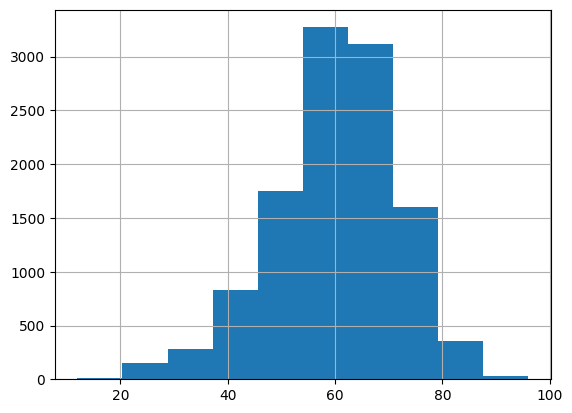

In [124]:
# 1. composure
dropped['composure'].hist()  # normal dist -> take mean

dropped['composure'] = dropped['composure'].fillna(np.mean(dropped['composure']))
# dropped['composure'].value_counts()

In [125]:
dropped['a_w'].unique()

array(['High', 'Medium', 'Low', nan], dtype=object)

In [126]:
# 2. work rates
# as there are 3 categories: 'High', 'Medium', 'Low'
# we decide to replace NaN with 'Medium'

dropped['a_w'] = dropped['a_w'].fillna('Medium')
dropped['d_w'] = dropped['d_w'].fillna('Medium')

/tmp/ipykernel_14944/633252615.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped['a_w'] = dropped['a_w'].fillna('Medium')
/tmp/ipykernel_14944/633252615.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped['d_w'] = dropped['d_w'].fillna('Medium')


In [127]:
dropped.shape

(11701, 64)

In [128]:
# 3. drop 41 rows with missing values in agility, vision,...
# because they are not easy to fill fairly and we have over 11,000 rows

dropped = dropped.dropna(subset=['vision'])
dropped.shape

(11660, 64)

In [129]:
types = pd.DataFrame(dropped.dtypes)
types.to_csv('types.csv')

In [130]:
# clean columns

In [131]:
# clean 

def get_height(x: str):
    feet, inch = x.split("'")
    inch = inch.rstrip('"')
    return int(feet)*30.48 + int(inch)*2.54


dropped['height'] = dropped['height'].apply(get_height)

In [132]:
dropped['weight_lbs'] = dropped['weight'].str.rstrip("lbs").astype(int)
dropped = dropped.drop(['weight'], axis=1)

In [133]:
def get_value(x):
    x = str(x)
    if x[-1] == 'M':
        x = x[1:-1]
        return 1000000 * float(x)
    elif x[-1] == 'K':
        x = x[1:-1]
        return 1000 * float(x)
    else:
        x = x[1:]
        return float(x)


dropped['value'] = dropped['value'].apply(get_value)
dropped['wage'] = dropped['wage'].apply(get_value)
dropped['release_clause'] = dropped['release_clause'].apply(get_value)

In [134]:
def get_stars(x):
    return int(x[0])

dropped['w_f'] = dropped['w_f'].apply(get_stars)
dropped['sm'] = dropped['sm'].apply(get_stars)
dropped['ir'] = dropped['ir'].apply(get_stars)

In [135]:
dropped.dtypes.to_csv('types.csv')

In [136]:
# splitting the target data from dataframe

y = dropped['ova']
dropped = dropped.drop(['ova'], axis=1)

# splitting numerical and categorical

fifa_nums = dropped.select_dtypes(include=np.number)
fifa_cats = dropped.select_dtypes(include=object)

In [137]:
from sklearn.preprocessing import MinMaxScaler 

minmax = MinMaxScaler().fit(fifa_nums)
X_norm_m = minmax.transform(fifa_nums)
X_norm_m = pd.DataFrame(X_norm_m, columns=fifa_nums.columns)
X_norm_m.describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
age,11660.0,0.342764,0.183235,0.0,0.185185,0.333333,0.481481,1.0
height,11660.0,0.517406,0.136114,0.0,0.400000,0.500000,0.600000,1.0
growth,11660.0,0.212719,0.223634,0.0,0.000000,0.153846,0.384615,1.0
value,11660.0,0.028364,0.058607,0.0,0.004167,0.008889,0.027778,1.0
wage,11660.0,0.018699,0.037936,0.0,0.001786,0.005357,0.019643,1.0
release_clause,11660.0,0.027284,0.060889,0.0,0.003026,0.007808,0.023423,1.0
attacking,11660.0,0.548227,0.183025,0.0,0.481013,0.579747,0.668354,1.0
crossing,11660.0,0.517899,0.203022,0.0,0.397727,0.568182,0.670455,1.0
finishing,11660.0,0.489386,0.210708,0.0,0.326087,0.532609,0.663043,1.0
heading_accuracy,11660.0,0.550679,0.192438,0.0,0.465909,0.579545,0.681818,1.0


In [138]:
from sklearn.preprocessing import StandardScaler 

stan = StandardScaler().fit(fifa_nums)
X_norm_s = stan.transform(fifa_nums)
X_norm_s = pd.DataFrame(X_norm_m, columns=fifa_nums.columns)
X_norm_s.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
age,11660.0,0.342764,0.183235,0.0,0.185185,0.333333,0.481481,1.0
height,11660.0,0.517406,0.136114,0.0,0.400000,0.500000,0.600000,1.0
growth,11660.0,0.212719,0.223634,0.0,0.000000,0.153846,0.384615,1.0
value,11660.0,0.028364,0.058607,0.0,0.004167,0.008889,0.027778,1.0
wage,11660.0,0.018699,0.037936,0.0,0.001786,0.005357,0.019643,1.0


In [139]:
from sklearn.preprocessing import OneHotEncoder

def normit(x: str):
    x = x.replace(' ', '_')
    x = x.replace('-', '_')
    return x.lower()


encoder = OneHotEncoder(drop='first').fit(pd.DataFrame(fifa_cats))
encoded = encoder.transform(pd.DataFrame(fifa_cats)).toarray()

cols = encoder.get_feature_names_out(input_features=fifa_cats.columns)
cols = list(map(normit, cols))  

onehot_encoded_cats = pd.DataFrame(encoded, columns=cols)
onehot_encoded_cats

,bp_cb,bp_cdm,bp_cf,bp_cm,bp_gk,bp_lb,bp_lm,bp_lw,bp_lwb,bp_rb,bp_rm,bp_rw,bp_rwb,bp_st,foot_right,a_w_low,a_w_medium,d_w_low,d_w_medium
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
11656,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
11657,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
11658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [140]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X = pd.concat((X_norm_m, onehot_encoded_cats), axis=1)

lm = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
lm.fit(X_train, y_train)

LinearRegression()

In [142]:
import pickle

pred_train = lm.predict(X_train)
print(r2_score(y_train, pred_train))
pred_test = lm.predict(X_test)
print(r2_score(y_test, pred_test))

pickle.dump(lm, open('model.sav', 'wb'))

0.9203213014547615
0.9178470459795224


In [147]:
X_train

,age,growth,value,reactions,power,shot_power,vision,composure,total_stats,base_stats,pas,dri,phy
8667,0.444444,0.000000,0.012222,0.577465,0.672026,0.734940,0.635294,0.630952,0.669421,0.553435,0.573529,0.641791,0.515152
5011,0.222222,0.307692,0.051111,0.549296,0.508039,0.614458,0.611765,0.595238,0.591227,0.595420,0.529412,0.701493,0.545455
1858,0.259259,0.346154,0.040000,0.492958,0.620579,0.662651,0.635294,0.488095,0.616656,0.534351,0.558824,0.716418,0.454545
1933,0.370370,0.115385,0.028889,0.619718,0.581994,0.746988,0.423529,0.607143,0.554990,0.381679,0.441176,0.268657,0.681818
616,0.333333,0.038462,0.088889,0.633803,0.575563,0.746988,0.752941,0.702381,0.726637,0.683206,0.705882,0.731343,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,0.777778,0.000000,0.002667,0.718310,0.340836,0.433735,0.411765,0.619048,0.314685,0.633588,0.573529,0.626866,0.651515
10601,0.259259,0.230769,0.013333,0.647887,0.710611,0.674699,0.635294,0.678571,0.726001,0.679389,0.588235,0.597015,0.727273
2033,0.333333,0.153846,0.011111,0.577465,0.549839,0.433735,0.235294,0.595238,0.464717,0.301527,0.294118,0.238806,0.803030
9556,0.185185,0.192308,0.388889,0.802817,0.774920,0.783133,0.752941,0.797619,0.884298,0.923664,0.750000,0.805970,0.742424


In [143]:
dropped.columns

Index(['age', 'bp', 'height', 'foot', 'growth', 'value', 'wage',
       'release_clause', 'attacking', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling',
       'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing_tackle',
       'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats',
       'base_stats', 'w_f', 'sm', 'a_w', 'd_w', 'ir', 'pac', 'sho', 'pas',
       'dri', 'def', 'phy', 'weight_lbs'],
      dtype='object')

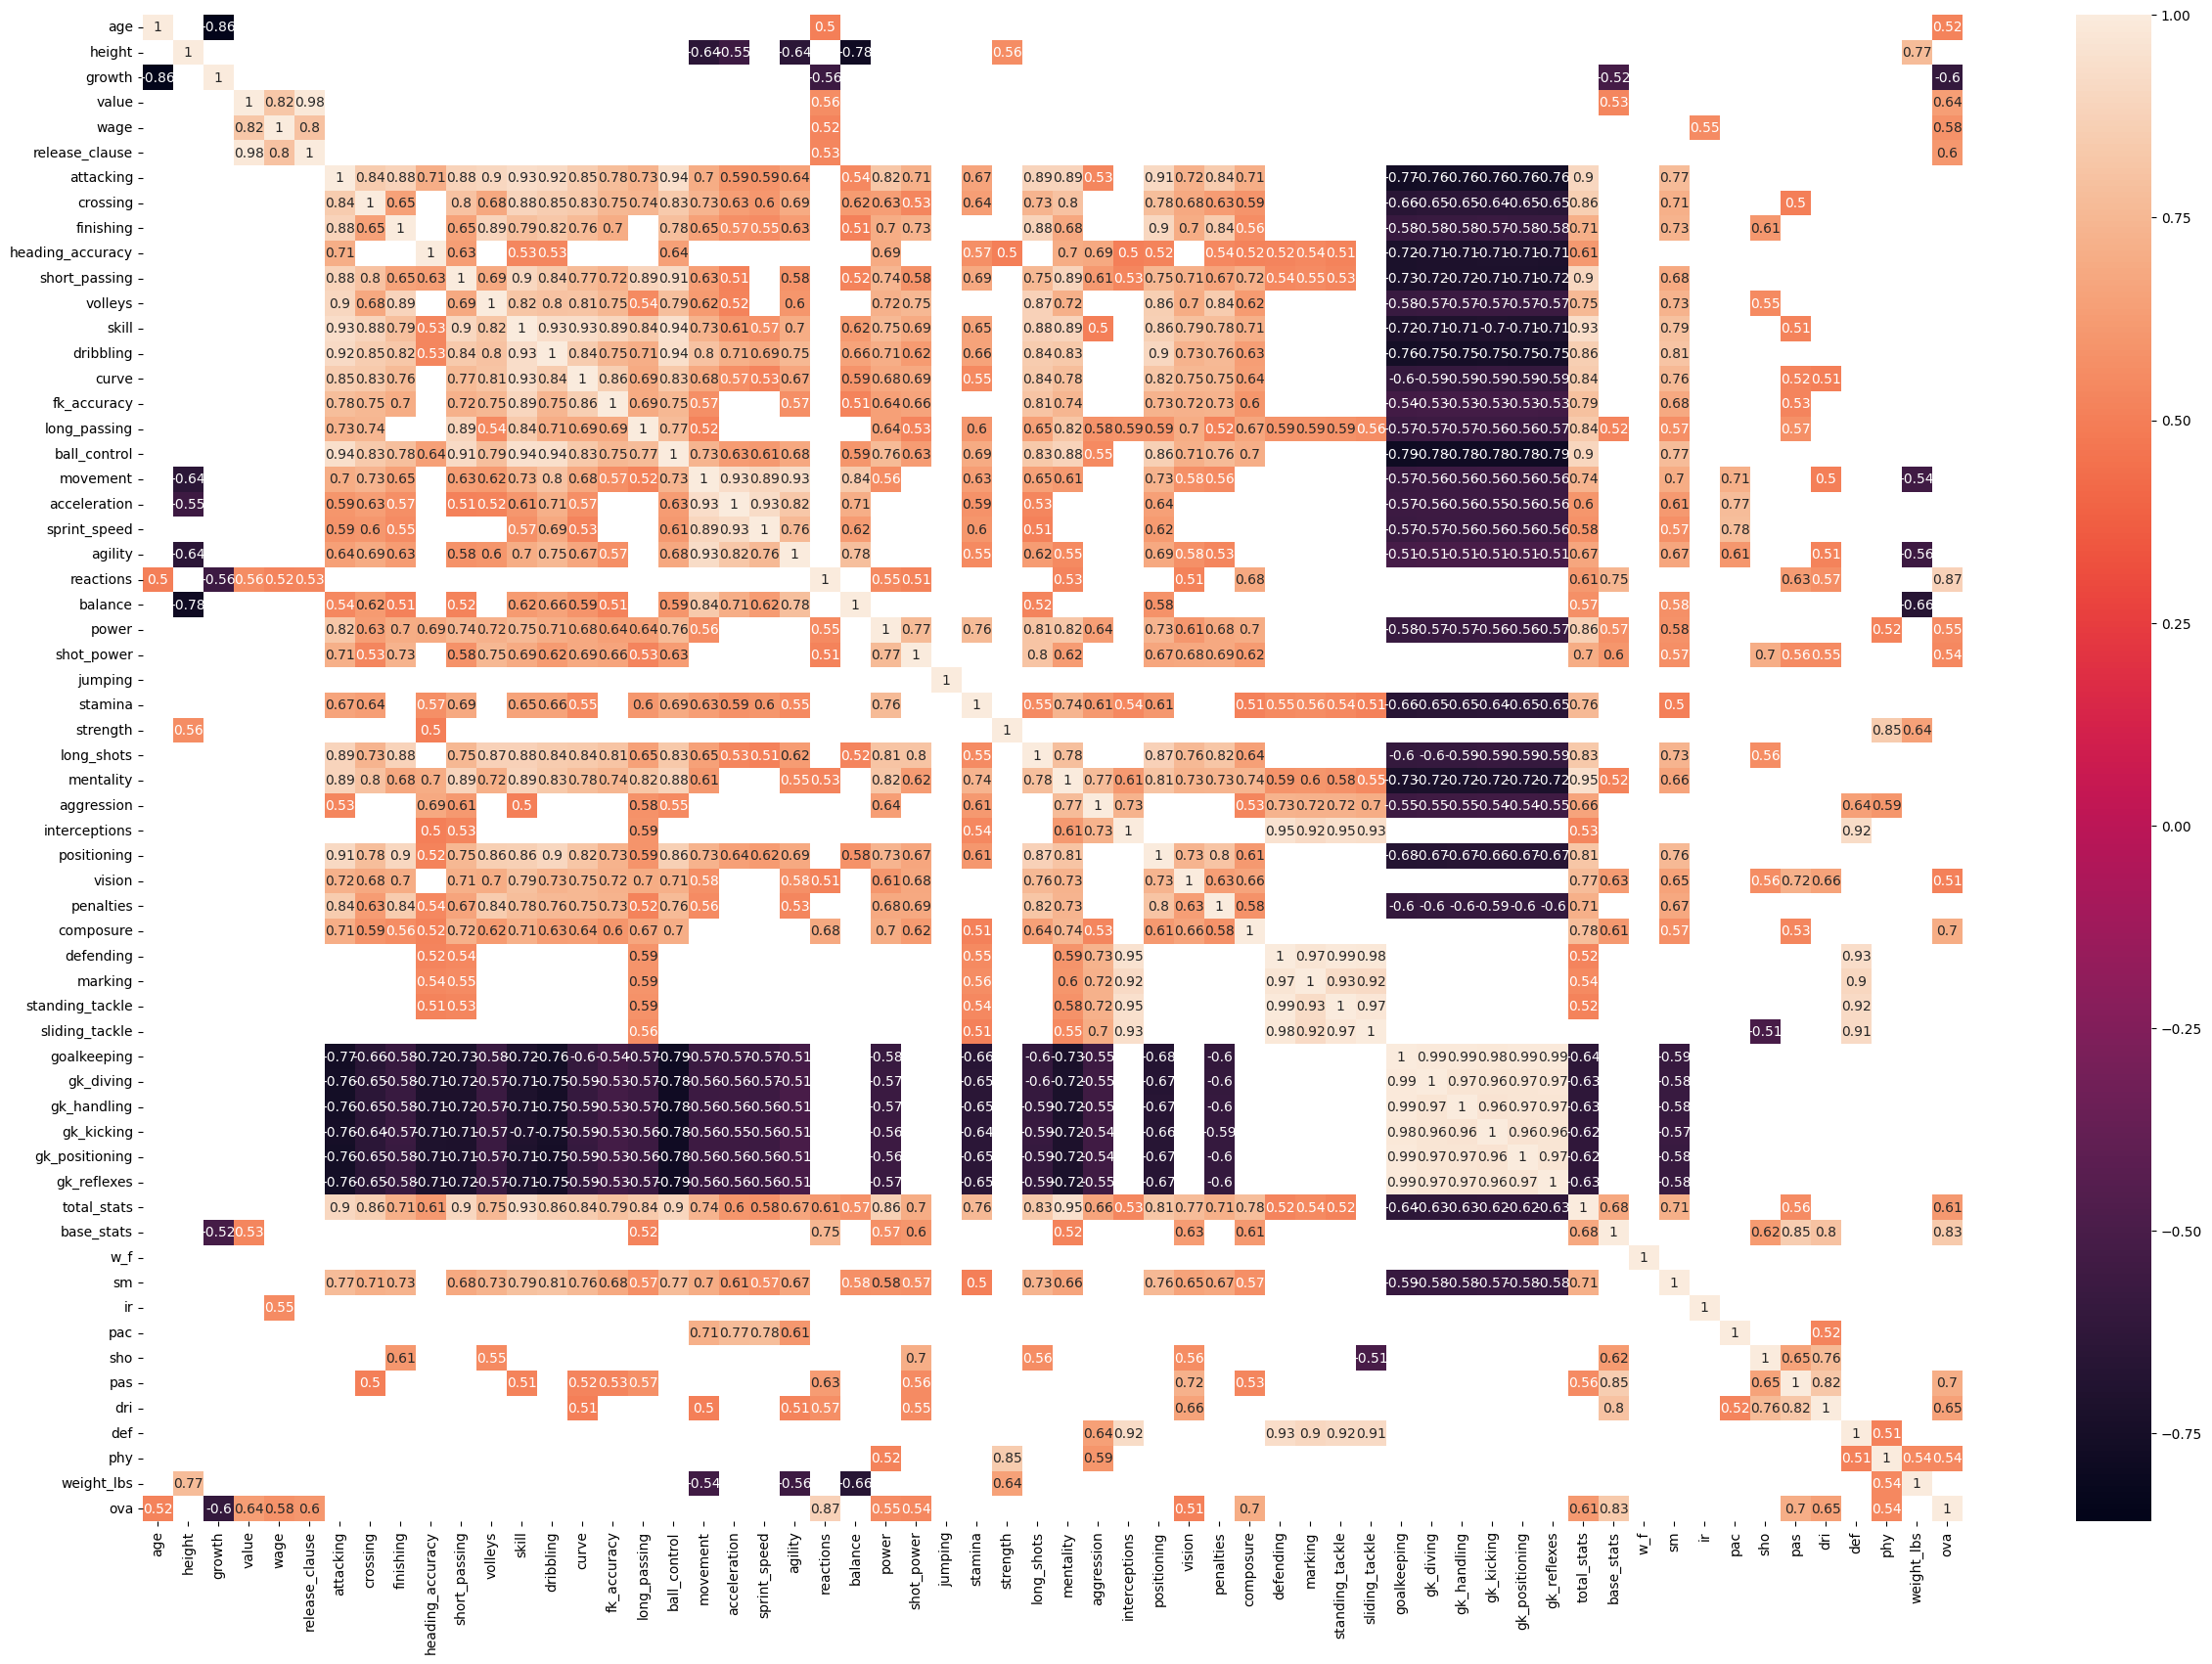

In [148]:
cor = X_norm_m[[
    'attacking', 'crossing', 'finishing',
    'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling',
    'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement',
    'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
    'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
    'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
    'penalties', 'composure', 'defending', 'marking', 'standing_tackle',
    'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling',
    'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats', 'base_stats'
    ]].corr()

corova = pd.concat((fifa_nums, y), axis=1).corr()

plt.figure(figsize=(30,20))
#mask = np.triu(np.ones_like(corova, dtype=bool))
sns.heatmap(corova, annot=True, mask=(np.abs(corova) <= 0.5))
plt.show()

In [149]:
# corr > 0.5

nums_reduced = fifa_nums[[
    'age', 'growth', 'value', 'reactions',
    'power', 'shot_power', 'vision', 'composure', 'total_stats',
    'base_stats', 'pas',
    'dri', 'phy'
]]

In [153]:
minmax2 = MinMaxScaler().fit(nums_reduced)
X_norm_r = minmax2.transform(nums_reduced)
X_norm_r = pd.DataFrame(X_norm_r, columns=nums_reduced.columns)
X_norm_r.describe().T.head()

X2 = pd.concat((X_norm_r, onehot_encoded_cats), axis=1)

lm2 = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_norm_r, y, test_size=0.2, random_state=8)
lm2.fit(X_train, y_train)

pickle.dump(lm2, open('model.sav', 'wb'))

pred_train = lm2.predict(X_train)
print(r2_score(y_train, pred_train))
pred_test = lm2.predict(X_test)
print(r2_score(y_test, pred_test))
X2.shape

0.8837232610577268
0.8840639196092878


(11660, 32)